In [334]:
import numpy as np
import numpy.random as npr

from scipy.optimize import fsolve # finding roots

%matplotlib inline
from pylab import mpl, plt
from mpl_toolkits.mplot3d import Axes3D # surface plot
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (10, 6)

---

In [332]:
from scipy import optimize
dir(optimize)

['BFGS',
 'Bounds',
 'HessianUpdateStrategy',
 'LbfgsInvHessProduct',
 'LinearConstraint',
 'NonlinearConstraint',
 'OptimizeResult',
 'OptimizeWarning',
 'RootResults',
 'SR1',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__nnls',
 '__package__',
 '__path__',
 '__spec__',
 '_basinhopping',
 '_bglu_dense',
 '_cobyla',
 '_constraints',
 '_differentiable_functions',
 '_differentialevolution',
 '_dual_annealing',
 '_group_columns',
 '_hessian_update_strategy',
 '_lbfgsb',
 '_linprog',
 '_linprog_ip',
 '_linprog_rs',
 '_linprog_simplex',
 '_linprog_util',
 '_lsap',
 '_lsap_module',
 '_lsq',
 '_minimize',
 '_minpack',
 '_nnls',
 '_numdiff',
 '_remove_redundancy',
 '_root',
 '_root_scalar',
 '_shgo',
 '_shgo_lib',
 '_slsqp',
 '_spectral',
 '_trlib',
 '_trustregion',
 '_trustregion_constr',
 '_trustregion_dogleg',
 '_trustregion_exact',
 '_trustregion_krylov',
 '_trustregion_ncg',
 '_zeros',
 'anderson',
 'approx_fprime',
 'basinhopping',


In [333]:
help(optimize)

Help on package scipy.optimize in scipy:

NAME
    scipy.optimize

DESCRIPTION
    Optimization and root finding (:mod:`scipy.optimize`)
    
    .. currentmodule:: scipy.optimize
    
    SciPy ``optimize`` provides functions for minimizing (or maximizing)
    objective functions, possibly subject to constraints. It includes
    solvers for nonlinear problems (with support for both local and global
    optimization algorithms), linear programing, constrained
    and nonlinear least-squares, root finding, and curve fitting.
    
    Common functions and objects, shared across different solvers, are:
    
    .. autosummary::
       :toctree: generated/
    
       show_options - Show specific options optimization solvers.
       OptimizeResult - The optimization result returned by some optimizers.
       OptimizeWarning - The optimization encountered problems.
    
    
    Optimization
    
    Scalar functions optimization
    -----------------------------
    
    .. autosummary::
 

In [108]:
# Coin Flip
iterations = 100
np.array([np.sum(npr.random(iterations) < 0.5) for _ in range(100)])

array([51, 46, 52, 53, 54, 59, 56, 52, 47, 48, 46, 41, 50, 53, 47, 48, 51,
       44, 45, 50, 54, 49, 48, 49, 44, 54, 48, 49, 45, 55, 54, 45, 51, 49,
       49, 49, 37, 46, 48, 48, 46, 47, 48, 51, 48, 46, 50, 50, 45, 56, 48,
       53, 38, 57, 49, 48, 51, 47, 55, 44, 47, 48, 48, 44, 53, 45, 51, 51,
       49, 51, 55, 57, 46, 50, 49, 45, 55, 56, 52, 52, 54, 43, 57, 39, 43,
       53, 52, 54, 48, 51, 54, 47, 51, 52, 57, 50, 49, 53, 46, 43])

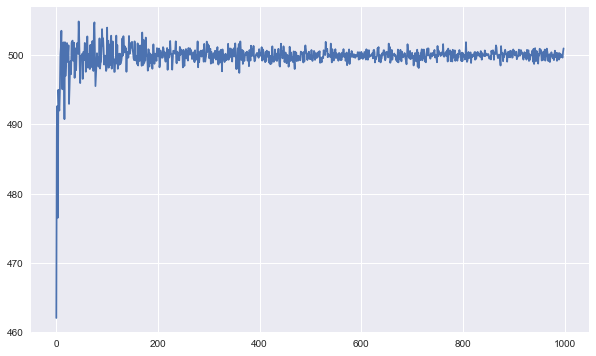

In [281]:
def get_mean (flips=int(1e3), num_experiments=100):
    return np.mean(np.array([np.sum(npr.random(flips) < 0.5) for _ in range(num_experiments)]))

means = []
for i in range(1, int(1e3)):
    means.append(get_mean(num_experiments=i))
plt.plot(means);

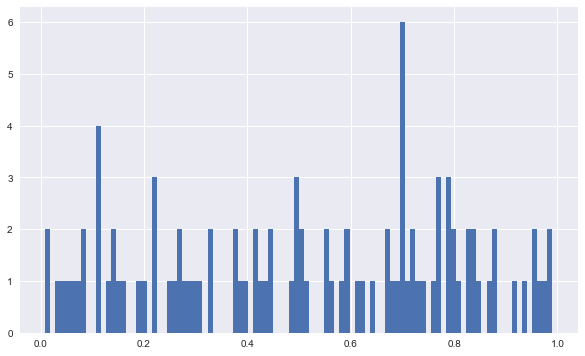

In [298]:
counts, bin_edges, _ = plt.hist(npr.random(100), bins=int(1e2))

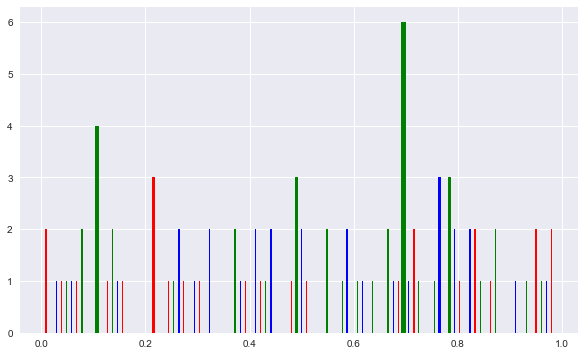

In [299]:
bin_size = bin_edges[1] - bin_edges[0]
new_widths = bin_size * counts / counts.max()
plt.bar(bin_edges[:-1], counts, width=new_widths, color=['r', 'g', 'b']);

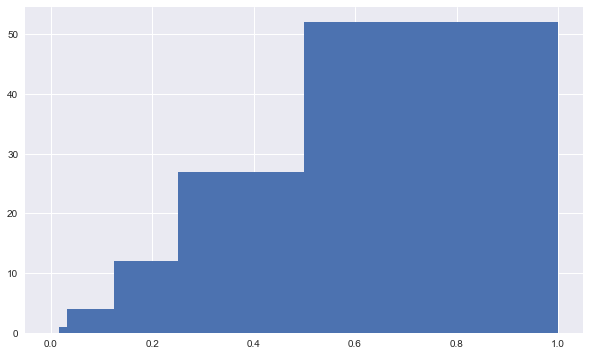

In [302]:
log2bins = np.logspace(-8, 0, num=9, base=2)
log2bins[0] = 0.0
counts, bin_edges, _ = plt.hist(npr.random(100), bins=log2bins)

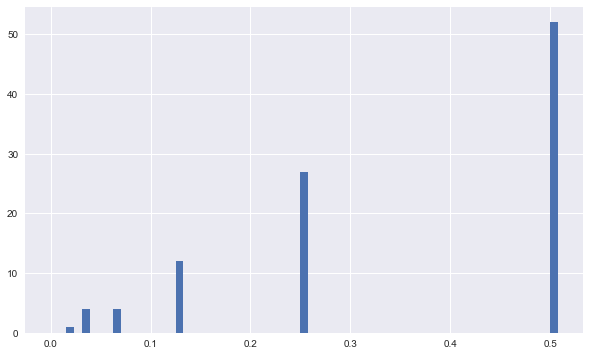

In [305]:
bin_size = bin_edges[1] - bin_edges[0]
plt.bar(bin_edges[:-1], counts, width=bin_size, align='edge');

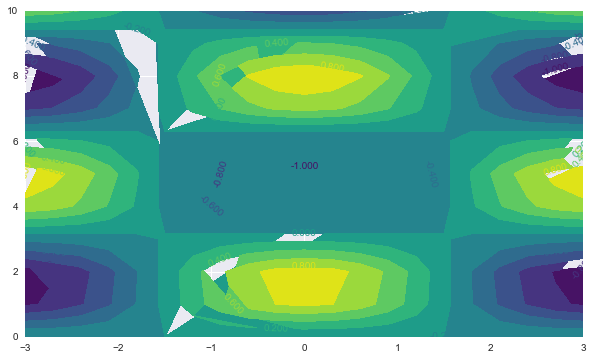

In [327]:
# Contour Plot
x_vals = np.linspace(-3, 3, 21)
y_vals = np.linspace(0, 10, 11)
X, Y = np.meshgrid(x_vals, y_vals)
R = np.sqrt(X**2 + Y**2)
Z = np.cos(X) * np.sin(Y)
cs = plt.contourf(X, Y, Z, 10, cmap=None)
plt.clabel(cs, fontsize=10);

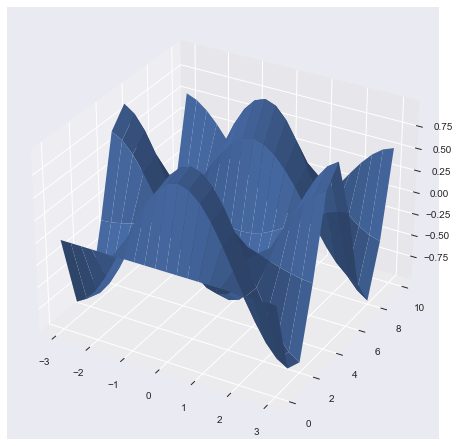

In [331]:
# Surface Plot
ax = Axes3D(plt.figure())
ax.plot_surface(X, Y, Z, rstride=1, cstride=1);

In [366]:
def find_roots (f, points=0):
    x = np.linspace(-10, 10, 1000)
    plt.plot(x, f(x));
    roots, infodict, ier, mesg = fsolve(f, points, full_output=True)
    plt.scatter(roots, np.zeros(len(roots)));
    if ier == 1:
        print('solution found')
    else:
        print('solution not found')

solution found


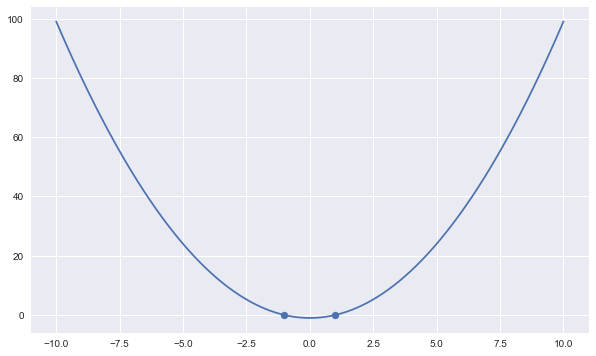

In [367]:
def f (x): return x**2 - 1
find_roots(f, [-0.5, 0.5])

solution not found


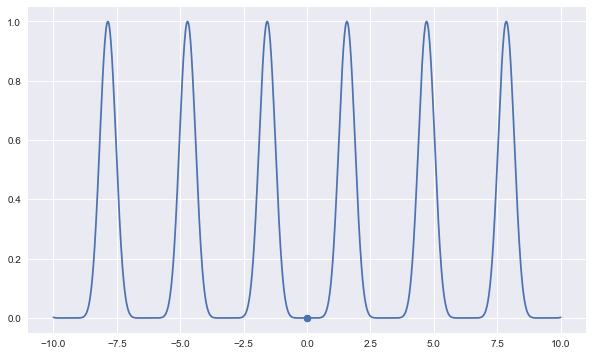

In [358]:
def f (x): return np.sin(x)**10
find_roots(f)

solution found


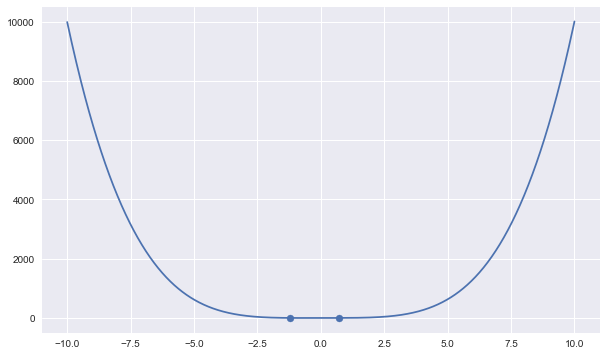

In [369]:
def f (x): return x * (1 + x**3) - 1
find_roots(f, [-1, 1])

In [371]:
np.roots([1,0,0,1,-1])

array([-1.22074408+0.j        ,  0.24812606+1.03398206j,
        0.24812606-1.03398206j,  0.72449196+0.j        ])

solution found


<ipython-input-373-9df5c294a716>:1: RuntimeWarning: invalid value encountered in power
  def f (x): return x**3.4 + x - 1


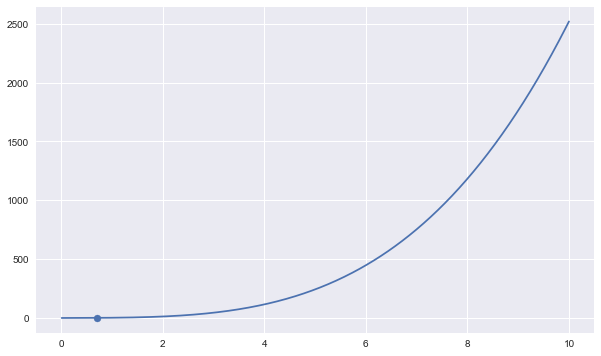

In [373]:
def f (x): return x**3.4 + x - 1
find_roots(f)